In [1]:
# Run `jupyter notebook` in the braidpool/tests directory, or add the path to the tests/ directory here
#sys.path.append('../braidpool/tests/') 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,4]
import braid
from simulator import *

In [2]:
# A larger network or lower difficulty makes thicker braids
# Re-run this block to generate a different braid.
# The target and hashrate parameters are measured on my CPU (Intel 3.3 GHz) Run `simulator.py --mine` to benchmark your CPU
n = Network(nnodes=50, target=2**240-1, hashrate=800000)
# Use `mine=False` to use the geometric distribution to simulate mining. Use `mine=True` to actually compute sha256d hashes (slower)
n.simulate(nbeads=30, mine=False) 

# Each node has its own braid, look at node 0's braid here.
b = n.nodes[0].braid
# Extract the `parents` dict as integers (hashes) instead of instances of the <Bead> object
hashed_parents = {int(k): set(map(int, v)) for k,v in dict(b).items()}
# Remap integers (hashes) in the parents array to sequential integers for display purposes
parents = braid.number_beads(hashed_parents)
children = braid.reverse(parents)
work = braid.descendant_work(parents)
hwpath = braid.highest_work_path(parents, children)
cohorts = list(braid.cohorts(parents))
print(f"Generated braid: {len(b.beads)} beads with {len(cohorts)} cohorts, {len(b.tips)} tips, "
      f"and {len(hwpath)} beads in the highest work path.")

Generated braid: 31 beads with 15 cohorts, 1 tips, and 20 beads in the highest work path.


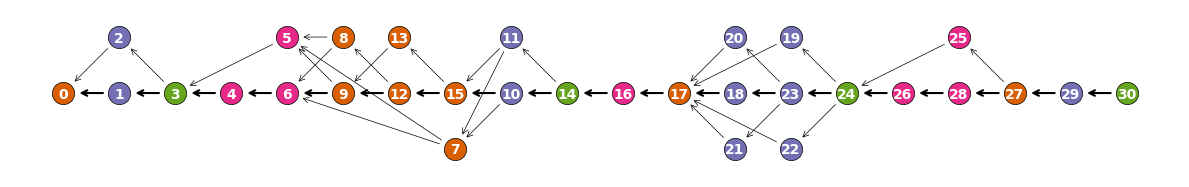

In [3]:
# The `layout()` function could use some work. It leaves some extra space and sometimes draws arrows over beads.
# If you want to work on it, I'd love to have beads place both above and below the highest work path, in order 
# of decreasing work as you move away from the highest work path vertically.
b.plot()

In [4]:
cohorts

[{0},
 {1, 2},
 {3},
 {4, 5, 6},
 {7, 8, 9, 12, 13, 15},
 {10, 11},
 {14},
 {16},
 {17},
 {18, 19, 20, 21, 22, 23},
 {24},
 {25, 26, 28},
 {27},
 {29},
 {30}]

2width.json
# Starting network with genesis bead 1e1567e6 at time          0.0


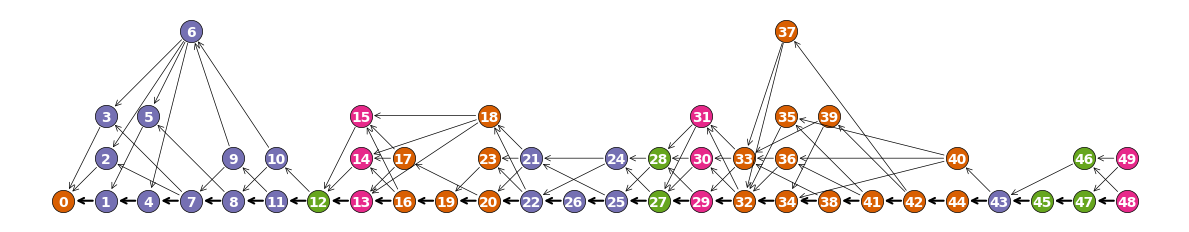

3cohort_tipcohort.json
# Starting network with genesis bead 1e1567e6 at time          0.0


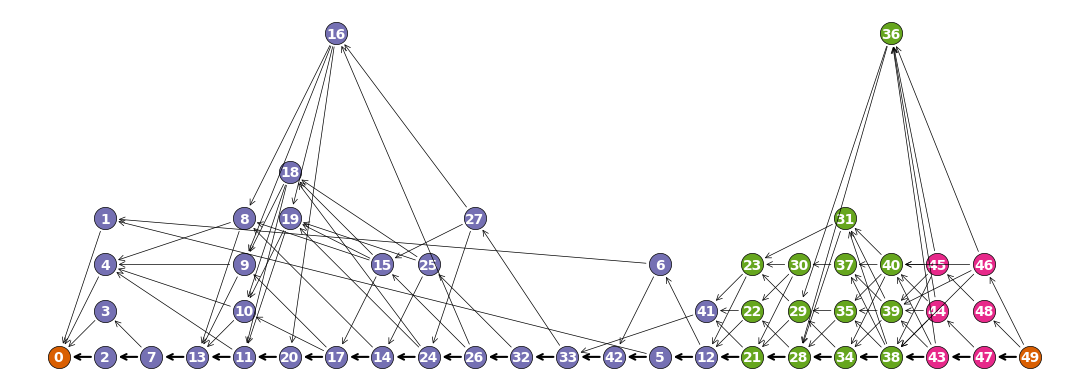

3w1missing.json
# Starting network with genesis bead 1e1567e6 at time          0.0


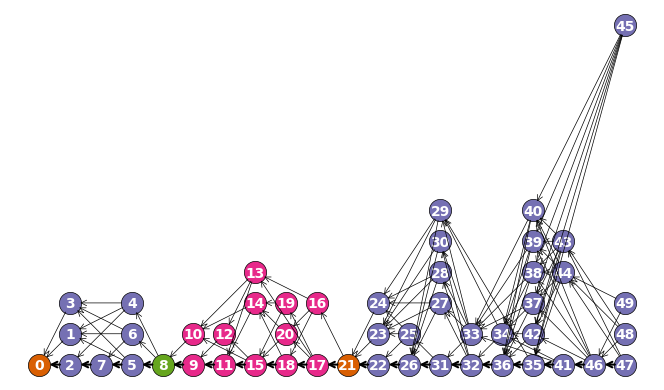

blob1.json
# Starting network with genesis bead 1e1567e6 at time          0.0


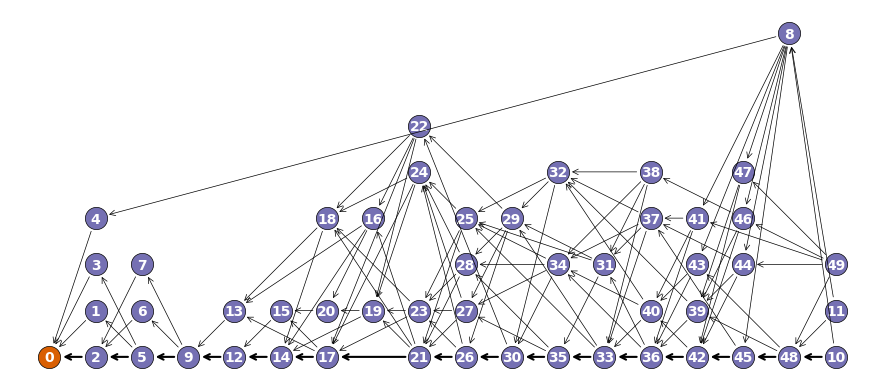

blob2.json
# Starting network with genesis bead 1e1567e6 at time          0.0


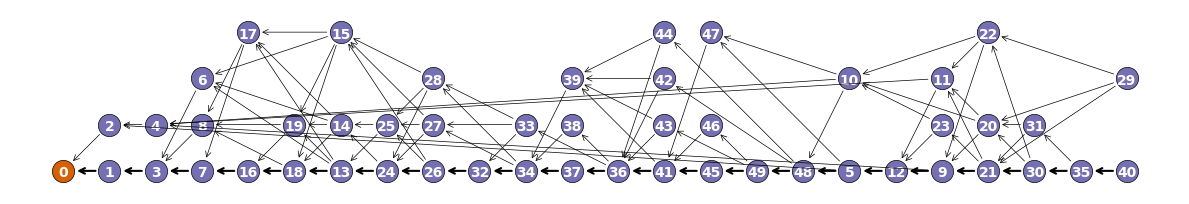

blob3.json
# Starting network with genesis bead 1e1567e6 at time          0.0


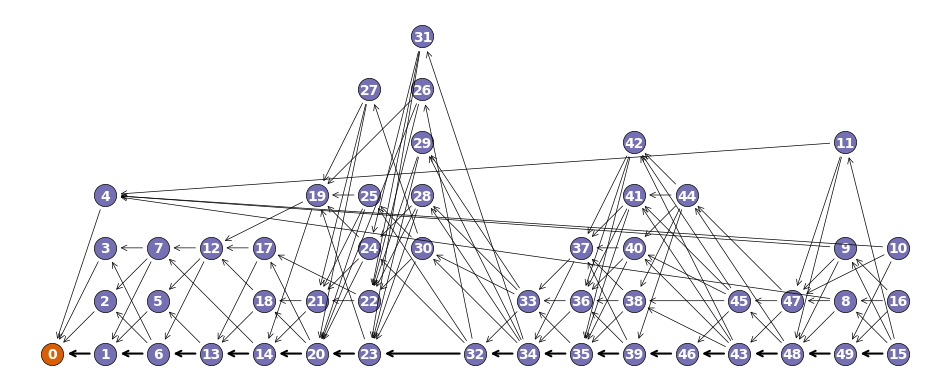

blob4.json
# Starting network with genesis bead 1e1567e6 at time          0.0


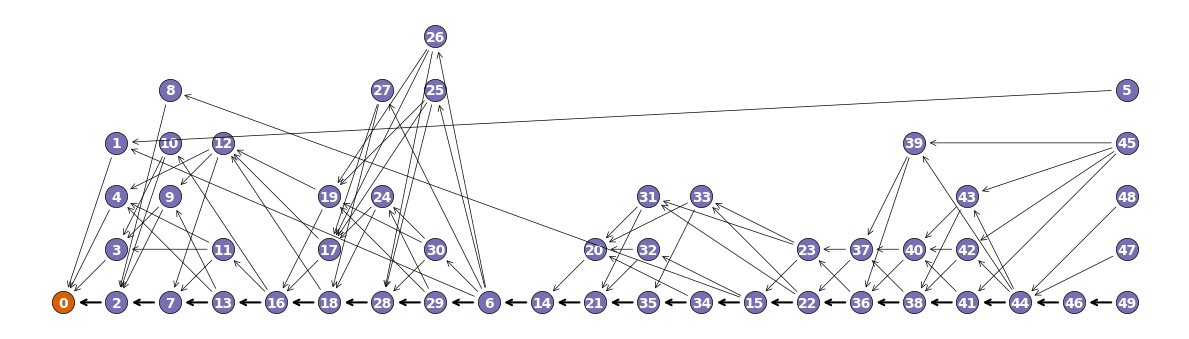

blob5.json
# Starting network with genesis bead 1e1567e6 at time          0.0


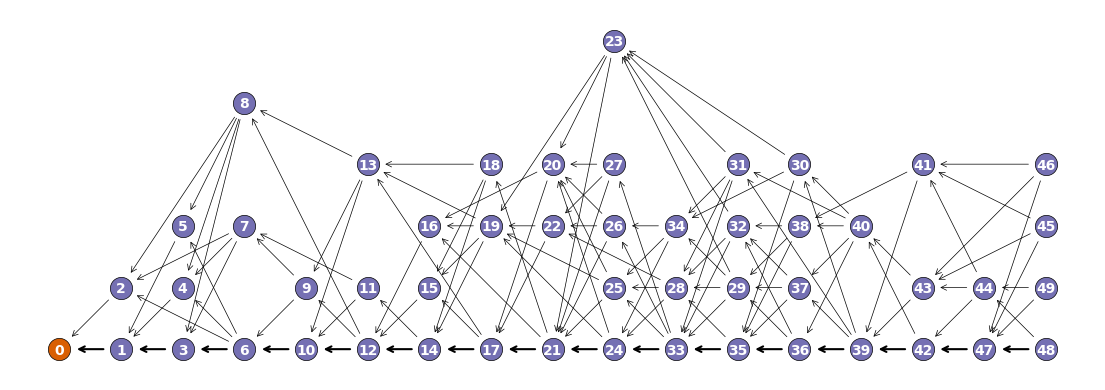

blob6.json
# Starting network with genesis bead 1e1567e6 at time          0.0


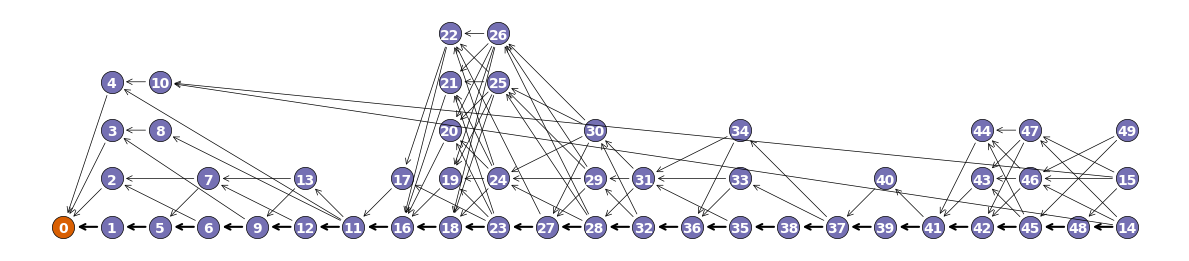

blob7.json
# Starting network with genesis bead 1e1567e6 at time          0.0


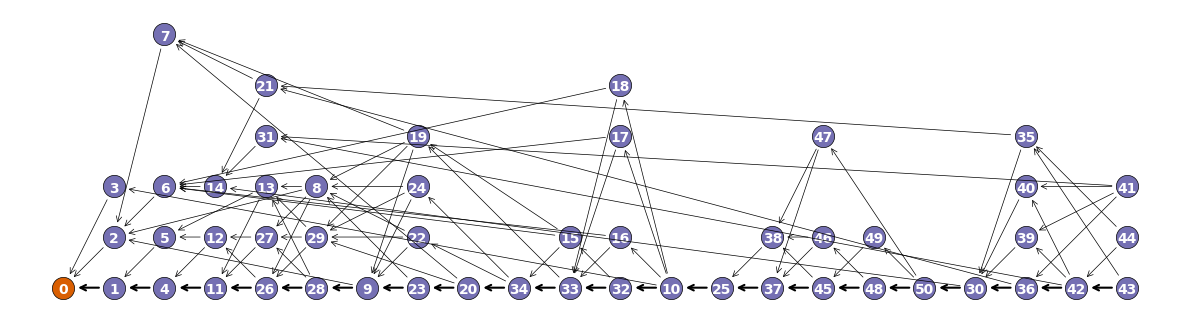

blob_1cohort.json
# Starting network with genesis bead 1e1567e6 at time          0.0


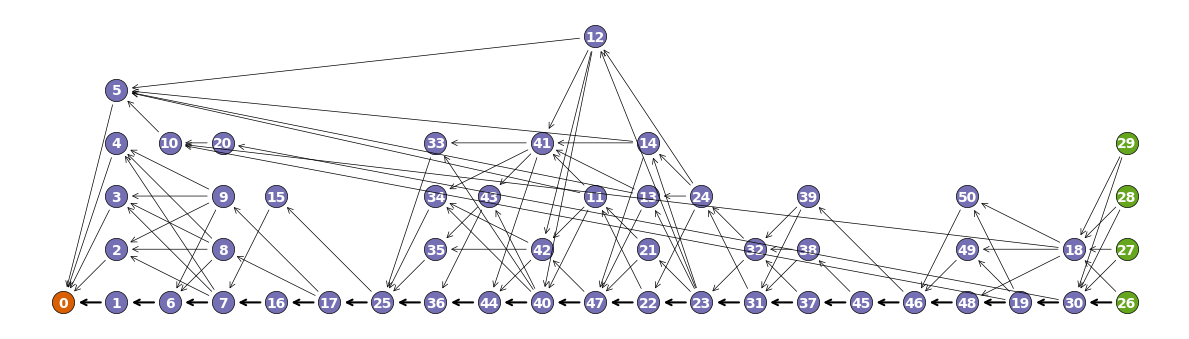

blob_1cohort2.json
# Starting network with genesis bead 1e1567e6 at time          0.0


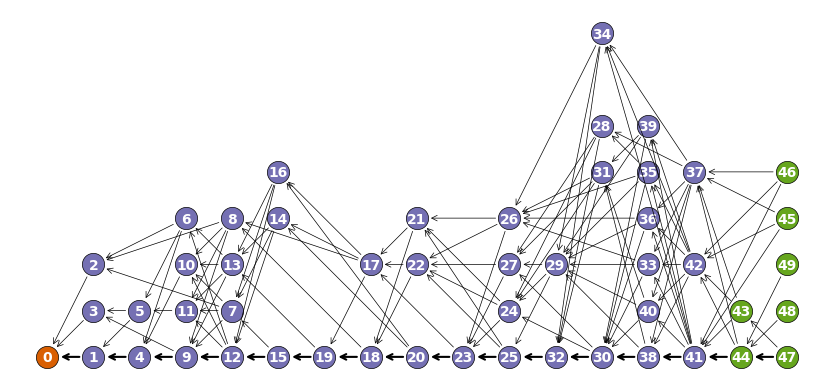

blob_closed_1bead.json
# Starting network with genesis bead 1e1567e6 at time          0.0


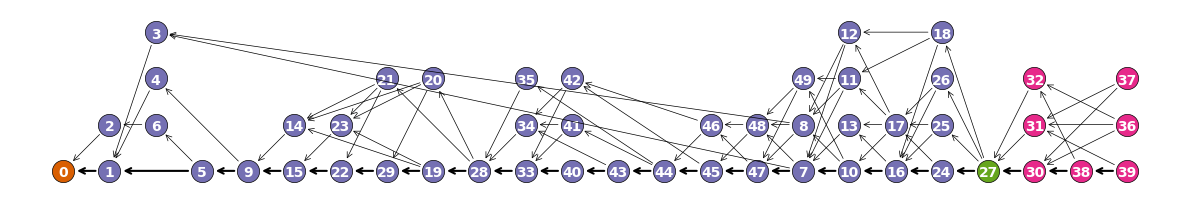

blob_closed_1bead_tip.json
# Starting network with genesis bead 1e1567e6 at time          0.0


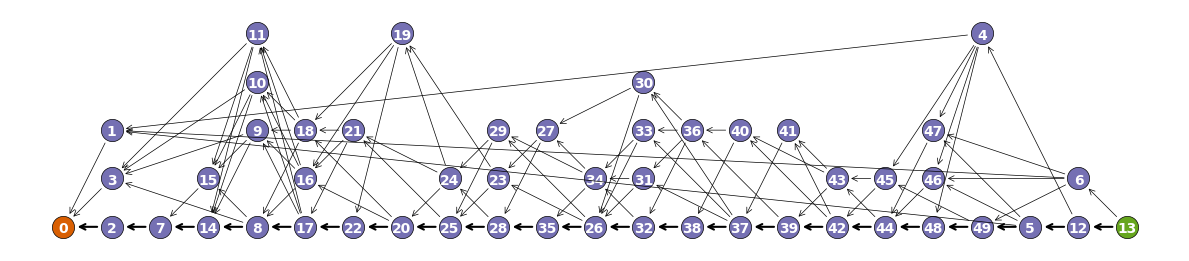

blockchain.json
# Starting network with genesis bead 1e1567e6 at time          0.0


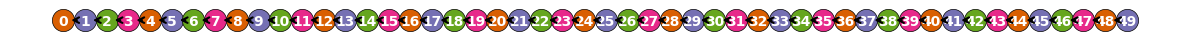

dangling_tip.json
# Starting network with genesis bead 1e1567e6 at time          0.0


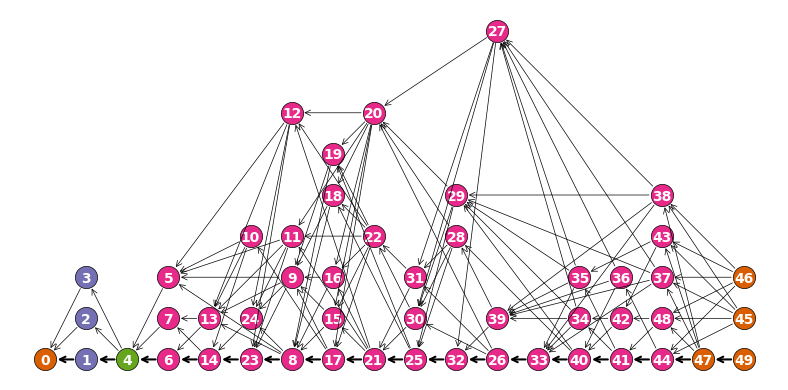

ladder.json
# Starting network with genesis bead 1e1567e6 at time          0.0


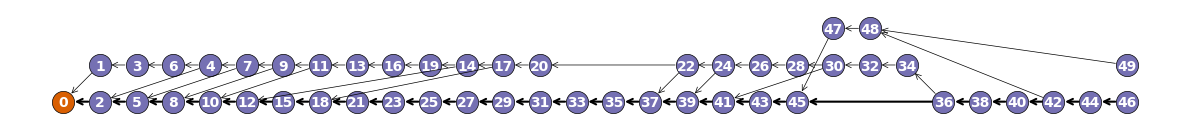

manytips.json
# Starting network with genesis bead 1e1567e6 at time          0.0


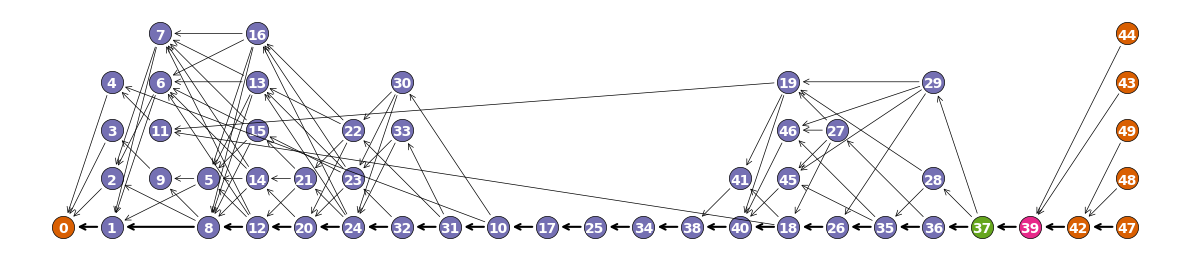

one_more_bead.json
# Starting network with genesis bead 1e1567e6 at time          0.0


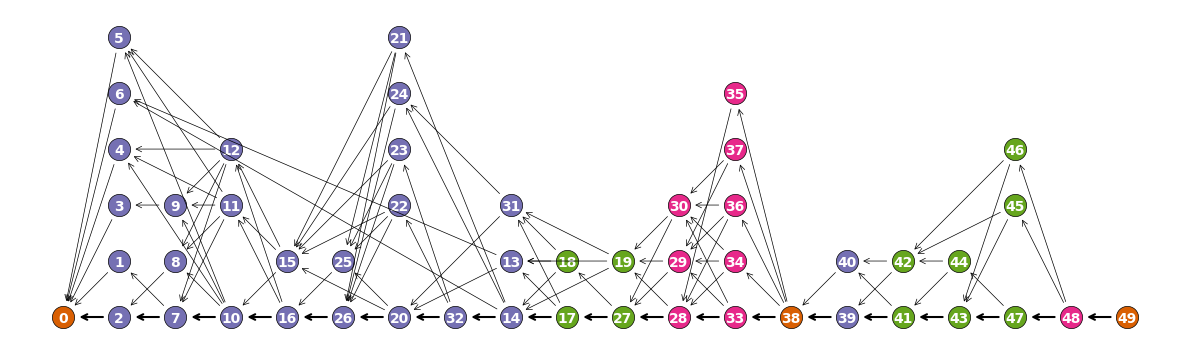

pairtip.json
# Starting network with genesis bead 1e1567e6 at time          0.0


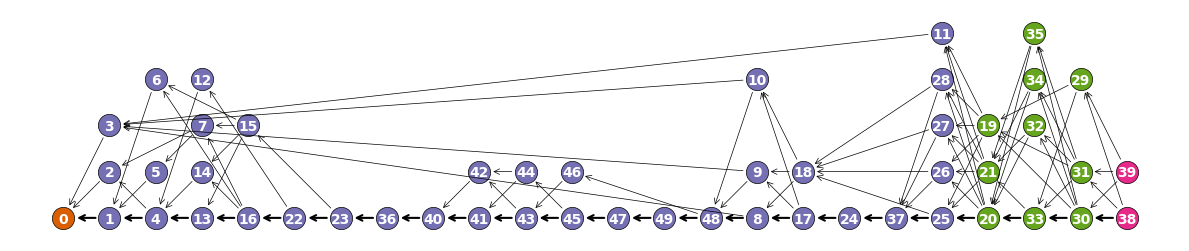

random1.json
# Starting network with genesis bead 1e1567e6 at time          0.0


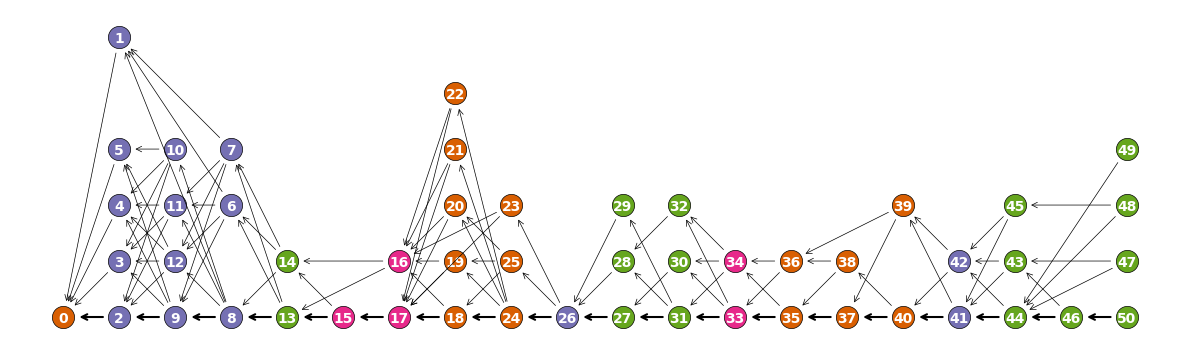

random10.json
# Starting network with genesis bead 1e1567e6 at time          0.0


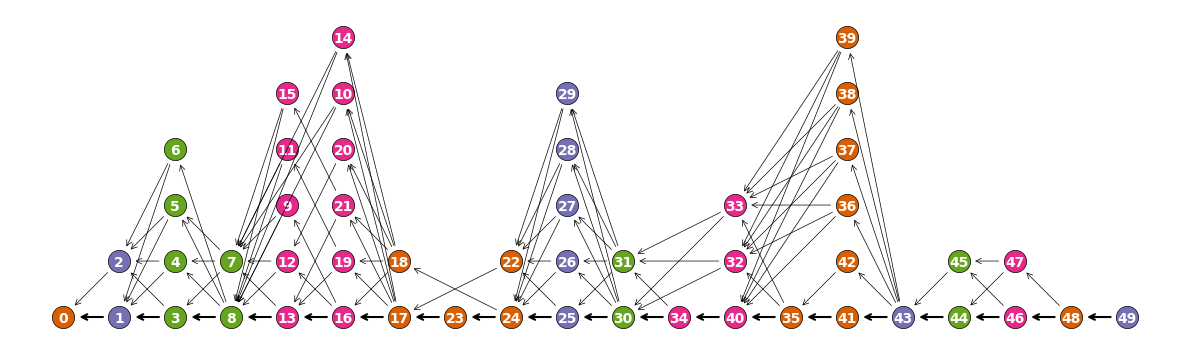

random2.json
# Starting network with genesis bead 1e1567e6 at time          0.0


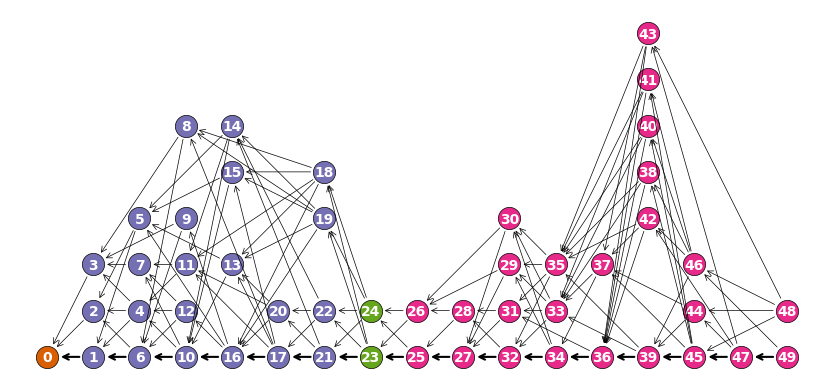

random3.json
# Starting network with genesis bead 1e1567e6 at time          0.0


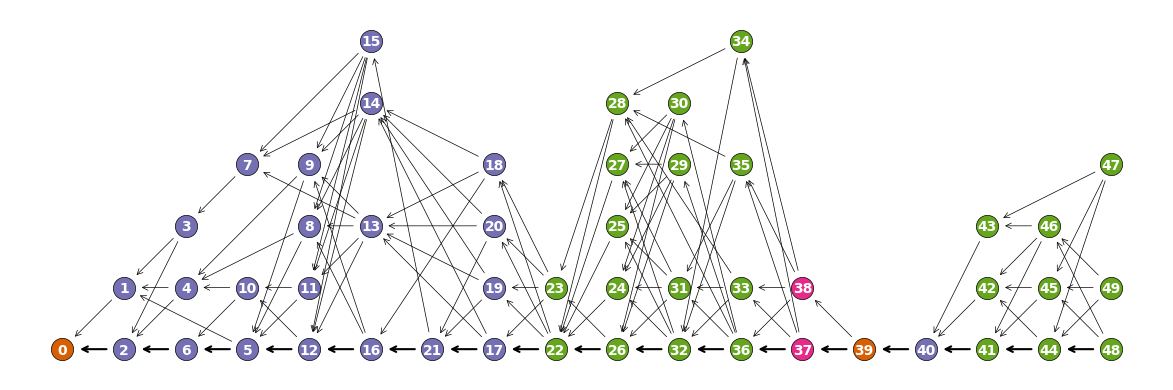

random4.json
# Starting network with genesis bead 1e1567e6 at time          0.0


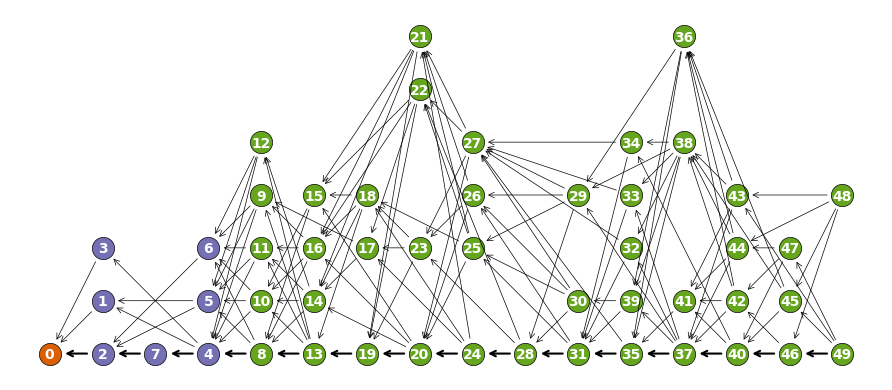

random5.json
# Starting network with genesis bead 1e1567e6 at time          0.0


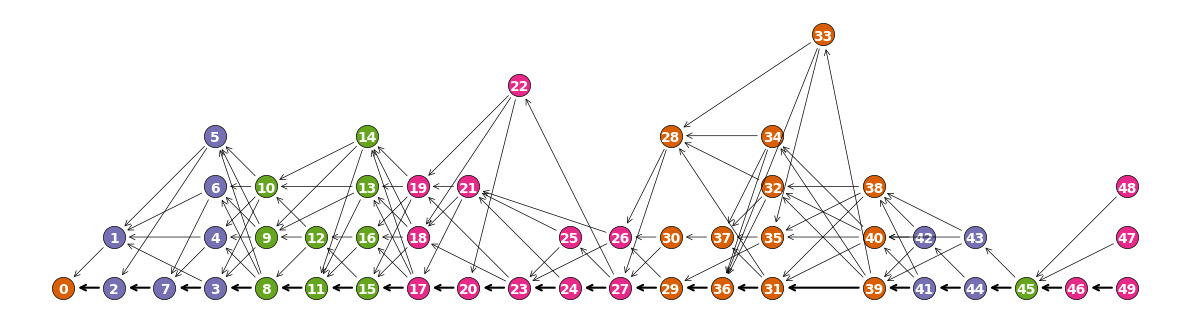

random6.json
# Starting network with genesis bead 1e1567e6 at time          0.0


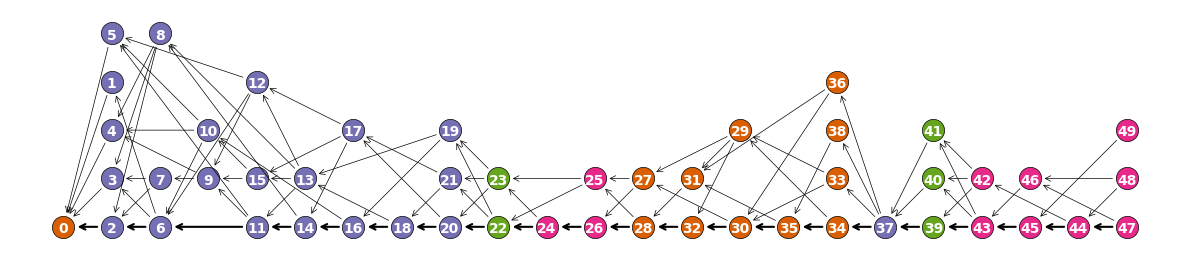

random7.json
# Starting network with genesis bead 1e1567e6 at time          0.0


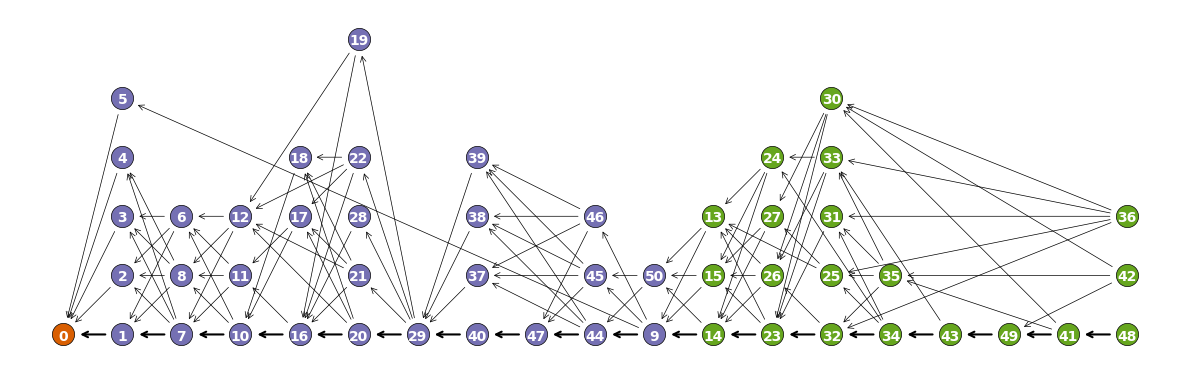

random8.json
# Starting network with genesis bead 1e1567e6 at time          0.0


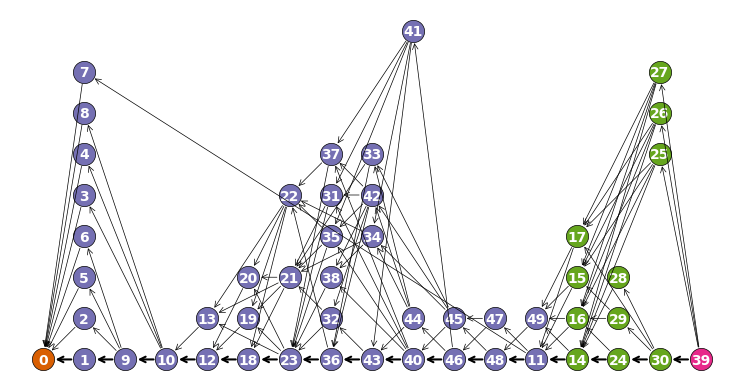

random9.json
# Starting network with genesis bead 1e1567e6 at time          0.0


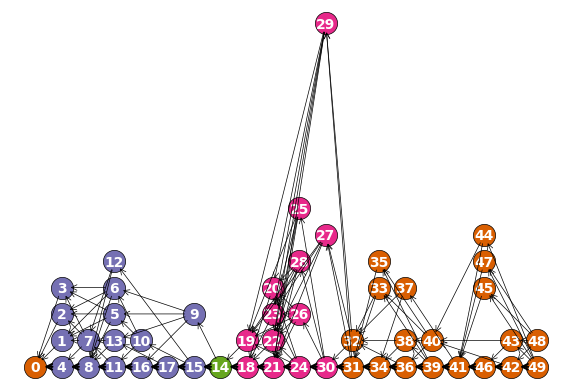

tail_intersect_head.json
# Starting network with genesis bead 1e1567e6 at time          0.0


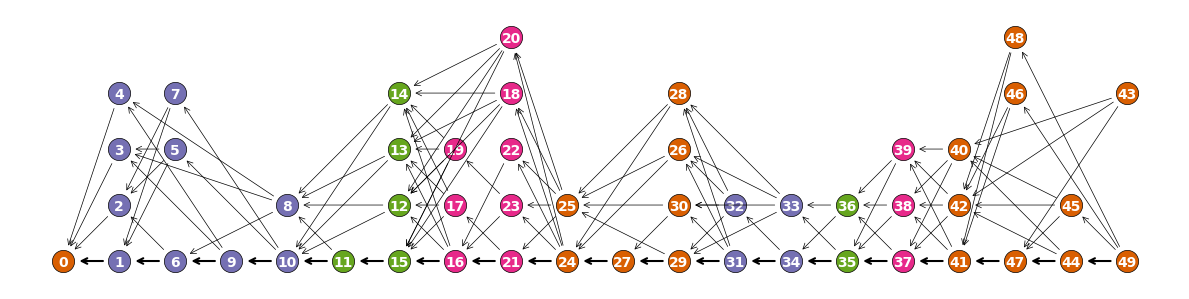

test.json
# Starting network with genesis bead 1e1567e6 at time          0.0


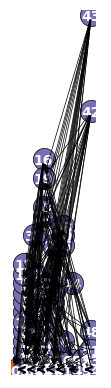

triangle_pentagon.json
# Starting network with genesis bead 1e1567e6 at time          0.0


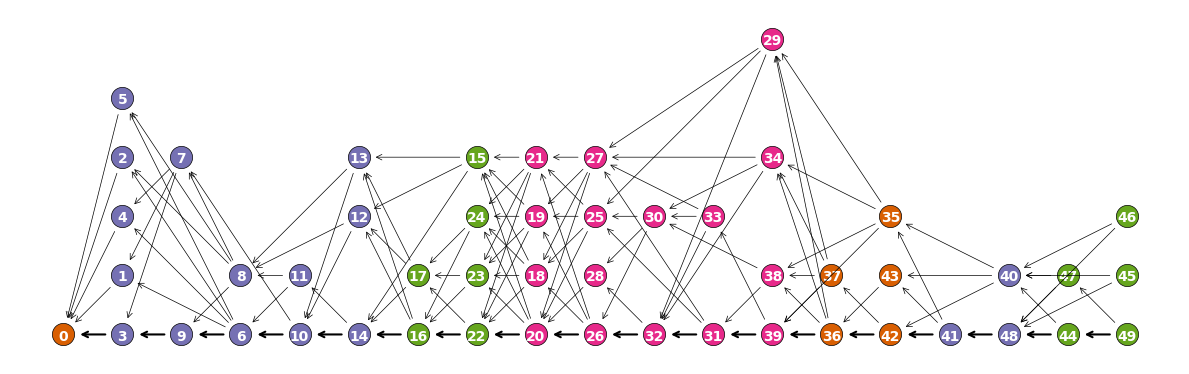

In [5]:
# Graph all test case braids. These are NASTY
import os
TEST_CASE_DIR = "braids/"
for filename in sorted([filename for filename in os.listdir(TEST_CASE_DIR) if filename.endswith(".json")]):
    print(filename)
    b = Braid(filename=TEST_CASE_DIR+filename)
    b.plot()


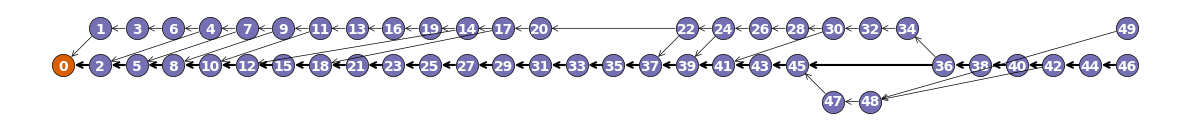

In [4]:
import os
TEST_CASE = "braids/ladder.json"
b = Braid(filename=TEST_CASE)
b.plot()

In [9]:
[{int(k): v for k,v in sorted(c.items())} for c in braid.layout(b.cohorts[1], dict(b))]

[{1: [0, 1],
  2: [0, 0],
  3: [1, 1],
  4: [3, 1],
  5: [1, 0],
  6: [2, 1],
  7: [4, 1],
  8: [2, 0],
  9: [5, 1],
  10: [3, 0],
  11: [6, 1],
  12: [4, 0],
  13: [7, 1],
  14: [10, 1],
  15: [5, 0],
  16: [8, 1],
  17: [11, 1],
  18: [6, 0],
  19: [9, 1],
  20: [12, 1],
  21: [7, 0],
  22: [16, 1],
  23: [8, 0],
  24: [17, 1],
  25: [9, 0],
  26: [18, 1],
  27: [10, 0],
  28: [19, 1],
  29: [11, 0],
  30: [20, 1],
  31: [12, 0],
  32: [21, 1],
  33: [13, 0],
  34: [22, 1],
  35: [14, 0],
  36: [23, 0],
  37: [15, 0],
  38: [24, 0],
  39: [16, 0],
  40: [25, 0],
  41: [17, 0],
  42: [26, 0],
  43: [18, 0],
  44: [27, 0],
  45: [19, 0],
  46: [28, 0],
  47: [20, -1],
  48: [21, -1],
  49: [28, 1]},
 {46: [28, 0], 49: [28, 1]}]

In [28]:
dWork = {int(k):v for k,v in braid.descendant_work(dict(b)).items()}
aWork = {int(k):v for k,v in braid.descendant_work(braid.reverse(dict(b))).items()}



In [30]:
c1 = 44
c2 = 48
print(f"{c1} aWork = {aWork[c1]}, dWork = {dWork[c1]}")
print(f"{c2} aWork = {aWork[c2]}, dWork = {dWork[c2]}")

44 aWork = 41, dWork = 5
48 aWork = 41, dWork = 5


In [34]:
list(map(int, braid.highest_work_path(dict(b))))

[0, 1, 4, 6, 14, 23, 8, 17, 21, 25, 32, 26, 33, 39, 41, 44, 47, 49]

In [12]:
braid.number_beads(dict(b))

{0: set(),
 1: {0},
 2: {0},
 3: {0},
 4: {0},
 5: {0},
 6: {1, 2, 3, 5},
 7: {1, 2, 3, 5},
 8: {1, 2, 3, 5},
 9: {2, 3, 5},
 10: {4, 6, 7, 8, 9},
 11: {4, 6, 8, 9},
 12: {4, 6, 8, 9},
 13: {10, 11, 12},
 14: {10, 11, 12},
 15: {13, 14},
 16: {13, 14},
 17: {15},
 18: {16, 17},
 19: {16, 17},
 20: {16, 17},
 21: {16, 17},
 22: {16, 17},
 23: {16, 17},
 24: {18, 19, 21},
 25: {18, 19, 21, 22, 23},
 26: {20, 24, 25},
 27: {26},
 28: {26},
 29: {26},
 30: {27, 28, 29},
 31: {28},
 32: {29},
 33: {30, 31, 32},
 34: {30, 31, 32},
 35: {33, 34},
 36: {33, 34},
 37: {35},
 38: {35, 36},
 39: {36, 37},
 40: {37, 38},
 41: {39, 40},
 42: {39, 40},
 43: {41, 42},
 44: {41, 42},
 45: {41, 42},
 46: {43, 45},
 47: {44, 45},
 48: {44, 45},
 49: {45},
 50: {48}}

In [17]:
[{int(k): set(map(int, v))} for k,v in dict(b).items()]

[{0: set()},
 {1: {0}},
 {2: {0}},
 {3: {0}},
 {4: {0}},
 {5: {0}},
 {6: {1, 9, 11, 12}},
 {7: {1, 9, 10, 11, 12}},
 {8: {1, 9, 11, 12}},
 {9: {2, 3, 4, 5}},
 {10: {2, 3, 4, 5}},
 {11: {2, 3, 4}},
 {12: {2, 3, 4, 5}},
 {13: {6, 7, 8}},
 {14: {6, 7, 8}},
 {15: {13, 14}},
 {16: {13, 14}},
 {17: {15, 23}},
 {18: {15, 23}},
 {19: {15, 23}},
 {20: {15, 23}},
 {21: {15, 23}},
 {22: {15, 23}},
 {23: {16}},
 {24: {17, 18, 19, 20, 21}},
 {25: {17, 18, 19}},
 {26: {22, 24, 25}},
 {27: {26}},
 {28: {26}},
 {29: {26}},
 {30: {27}},
 {31: {27, 28, 29}},
 {32: {28}},
 {33: {30, 31, 32}},
 {34: {30, 31, 32}},
 {35: {33, 34}},
 {36: {33, 34}},
 {37: {35}},
 {38: {35, 36}},
 {39: {36, 37}},
 {40: {37, 38}},
 {41: {39, 40}},
 {42: {39, 40}},
 {43: {41, 42}},
 {44: {41, 42}},
 {45: {41, 42}},
 {46: {43, 44}},
 {47: {43, 44}},
 {48: {44, 45}},
 {49: {44}},
 {50: {46}}]

In [16]:
dict(b)

{<simulator.Bead at 0x765db0153650>: set(),
 <simulator.Bead at 0x765dd82dc150>: {<simulator.Bead at 0x765db0153650>},
 <simulator.Bead at 0x765dd82dc950>: {<simulator.Bead at 0x765db0153650>},
 <simulator.Bead at 0x765dd82dc550>: {<simulator.Bead at 0x765db0153650>},
 <simulator.Bead at 0x765dd82dc050>: {<simulator.Bead at 0x765db0153650>},
 <simulator.Bead at 0x765dd82dcc50>: {<simulator.Bead at 0x765db0153650>},
 <simulator.Bead at 0x765db00b10d0>: {<simulator.Bead at 0x765dd82dc150>,
  <simulator.Bead at 0x765d0bf27bd0>},
 <simulator.Bead at 0x765db00b1050>: {<simulator.Bead at 0x765dd82dc150>,
  <simulator.Bead at 0x765d0bf27bd0>},
 <simulator.Bead at 0x765d0bf25950>: {<simulator.Bead at 0x765dd82dc150>,
  <simulator.Bead at 0x765d0bf27bd0>},
 <simulator.Bead at 0x765d0bf27350>: {<simulator.Bead at 0x765dd82dc950>,
  <simulator.Bead at 0x765dd82dcc50>},
 <simulator.Bead at 0x765d0bf258d0>: {<simulator.Bead at 0x765dd82dc950>,
  <simulator.Bead at 0x765dd82dcc50>},
 <simulator.Bead